# Car Recommender System
For this project I have Used KMeans Clustering

The Data used here contains information about cars such as model,manufacturer,price,mileage ,etc.

The Goal Achieved here is when user enters a car model name, the algo will return all the cars name with same price range

Imported required libraries and Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
A=pd.read_csv("D:/python/Cars93.csv")
A.head(2)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
C=pd.DataFrame(A[['MPG.city','Price']])

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Z=pd.DataFrame(ss.fit_transform(C),columns=C.columns)

In [6]:
Z

,MPG.city,Price
0,0.471312,-0.375720
1,-0.781032,1.497844
2,-0.423219,0.998227
3,-0.602126,1.893374
4,-0.065407,1.091905
...,...,...
88,-0.959938,0.019810
89,-0.244313,0.051036
90,-0.781032,0.394523
91,-0.244313,0.332071


In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(Z)
model.labels_

array([0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2])

Text(0.5, 1.0, 'Price vs Mileage')

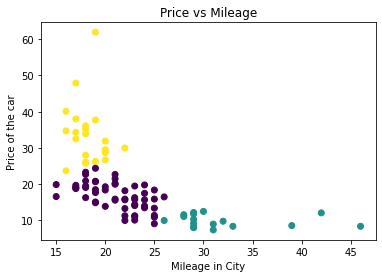

In [8]:
import matplotlib.pyplot as plt
plt.scatter(A['MPG.city'],A.Price,c=model.labels_)
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [9]:
model.cluster_centers_

array([[-0.23437376, -0.28127091],
       [ 1.68156148, -0.99779245],
       [-0.72410737,  1.46141368]])

In [10]:
centers=ss.inverse_transform(model.cluster_centers_)
a=pd.DataFrame(centers,columns=['x','y'])

In [11]:
a

,x,y
0,21.055556,16.807407
1,31.764706,9.923529
2,18.318182,33.550000


Text(0.5, 1.0, 'Price vs Mileage')

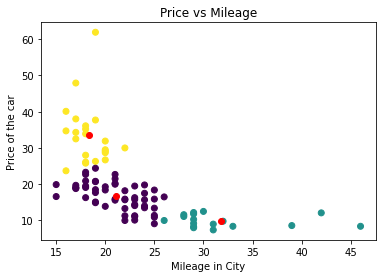

In [12]:
plt.scatter(A['MPG.city'],A.Price,c=model.labels_)
plt.scatter(a.x,a.y,c='red')
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [13]:
model.inertia_

55.24519288386834

In [16]:
K=[]
WCSS=[]
for i in range(1,20,1):
    km=KMeans(n_clusters=i)
    model=km.fit(Z)
    K.append(i)
    WCSS.append(model.inertia_)

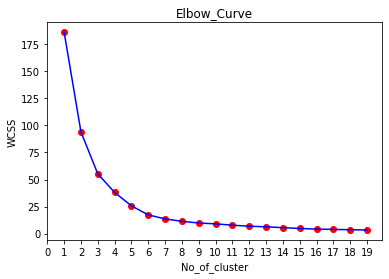

In [17]:
plt.scatter(K,WCSS,c='red')
plt.plot(K,WCSS,c='blue')
plt.xlabel('No_of_cluster')
plt.ylabel('WCSS')
plt.title('Elbow_Curve')
plt.xticks(range(0,20,1))
plt.show()

In [18]:
km = KMeans(n_clusters=4)
model = km.fit(C)
C["Clusters"]=model.labels_

In [19]:
C['Make']=A['Make']
C

,MPG.city,Price,Clusters,Make
0,25,15.9,0,Acura Integra
1,18,33.9,1,Acura Legend
2,20,29.1,1,Audi 90
3,19,37.7,1,Audi 100
4,22,30.0,1,BMW 535i
...,...,...,...,...
88,17,19.7,0,Volkswagen Eurovan
89,21,20.0,0,Volkswagen Passat
90,18,23.3,0,Volkswagen Corrado
91,21,22.7,0,Volvo 240


In [22]:
CarName=input('Enter your car of choice: ')
cluster_no=list(C[C.Make==CarName].Clusters)[0]
simcar=list(C[C.Clusters == cluster_no].Make)
simcar.remove(CarName)

print('Entered Car: ',CarName)
print('Similar Car: ',simcar)

Enter your car of choice: BMW 535i
Entered Car:  BMW 535i
Similar Car:  ['Acura Legend', 'Audi 90', 'Audi 100', 'Buick Roadmaster', 'Buick Riviera', 'Cadillac DeVille', 'Cadillac Seville', 'Chevrolet Corvette', 'Chrysler Imperial', 'Dodge Stealth', 'Lexus ES300', 'Lexus SC300', 'Lincoln Continental', 'Lincoln Town_Car', 'Mazda RX-7', 'Mercedes-Benz 190E', 'Mitsubishi Diamante', 'Pontiac Bonneville', 'Saab 900', 'Volvo 850']


In [23]:
CarName=input('Enter your car of choice: ')
cluster_no=list(C[C.Make==CarName].Clusters)[0]
simcar=list(C[C.Clusters == cluster_no].Make)
simcar.remove(CarName)

print('Entered Car: ',CarName)
print('Similar Car: ',simcar)

Enter your car of choice: Acura Integra
Entered Car:  Acura Integra
Similar Car:  ['Buick Century', 'Buick LeSabre', 'Chevrolet Cavalier', 'Chevrolet Camaro', 'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Chrysler LeBaron', 'Dodge Shadow', 'Dodge Spirit', 'Dodge Caravan', 'Dodge Dynasty', 'Eagle Vision', 'Ford Escort', 'Ford Tempo', 'Ford Mustang', 'Ford Probe', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Honda Prelude', 'Honda Accord', 'Hyundai Elantra', 'Hyundai Sonata', 'Mazda 626', 'Mazda MPV', 'Mercury Capri', 'Mercury Cougar', 'Nissan Altima', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Achieva', 'Oldsmobile Cutlass_Ciera', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Plymouth Laser', 'Pontiac Sunbird', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Subaru Legacy', 'Toyota Celica', 'Toyota Camry', 'Toyota Previa', 'Volkswagen Eurovan', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240']
